# Random Forests

### Import Libraries

In [397]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the [iris_data](https://archive.ics.uci.edu/ml/datasets/iris)

In [398]:
iris_data = datasets.load_iris()

print(iris_data.target_names)
print(iris_data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Preprocess the data

In [399]:
df = pd.DataFrame(
{
    'sepal_length':iris_data.data[:,0],
    'sepal_width':iris_data.data[:,1],
    'petal_length':iris_data.data[:,2],
    'petal_width':iris_data.data[:,3],
    'species':iris_data.target
})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [400]:
#Number of instances per class
df.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

In [401]:
# species -> target column
features = df.iloc[:,:4].values
targets = df['species']

### Visualization

<Figure size 432x288 with 0 Axes>

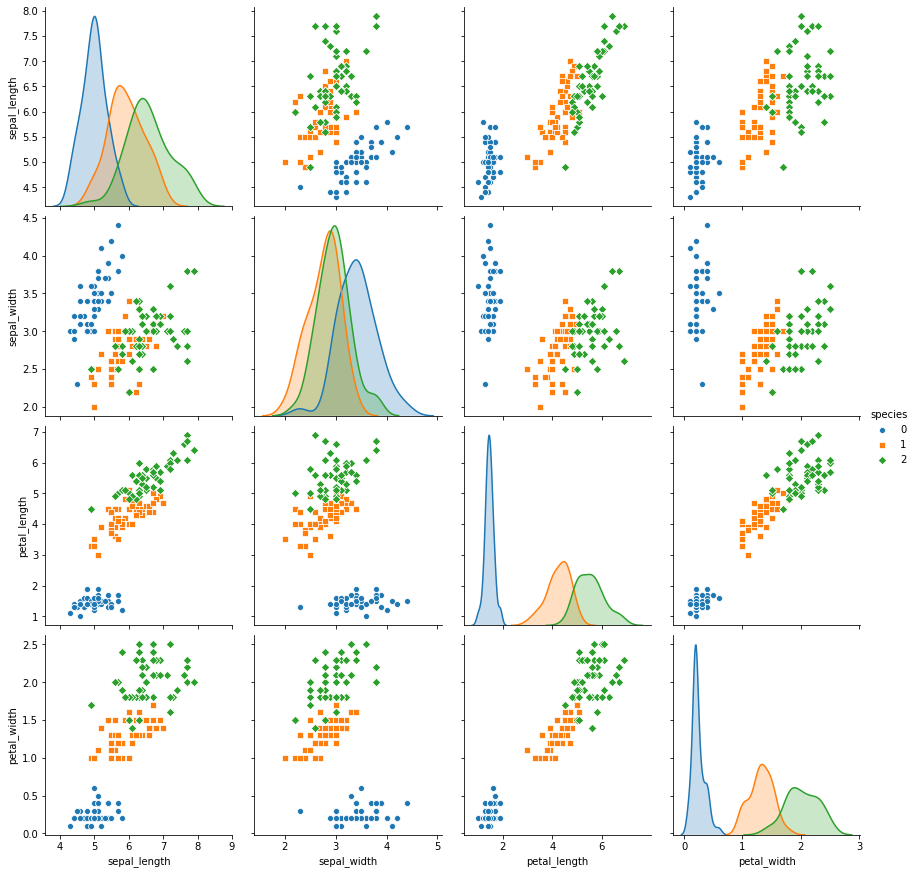

In [402]:
#pair_plot
#To explore the relationship between the features
plt.figure()
sns.pairplot(df,hue = "species", height=3, markers=["o", "s", "D"])
plt.show()

### Fitting the model

In [403]:
X_train, X_test, Y_train, Y_test = train_test_split(features,targets,test_size = 0.3,random_state = 1)
model_1 = RandomForestClassifier(n_estimators = 100,random_state = 1)
model_1.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [404]:
Y_pred = model_1.predict(X_test)

In [405]:
metrics.accuracy_score(Y_test,Y_pred)

0.9555555555555556

#### Accuracy is around 95.6%

### Improving the model

#### Hyperparameter selection

In [459]:
#using Exhaustive Grid Search
n_estimators = [2, 10, 100,500]
max_depth = [2, 10, 15,20]
min_samples_split = [1,2, 5, 10]
min_samples_leaf = [1, 2, 10,20]

hyper_param = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [460]:
gridF = GridSearchCV(RandomForestClassifier(random_state = 1), hyper_param, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, Y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:   36.5s finished


In [462]:
grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2}

In [487]:
#using these parameters
model_2 = RandomForestClassifier(n_estimators = 2,max_depth = 15, min_samples_leaf = 2, min_samples_split = 2)
model_2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=2)

In [488]:
Y_pred_2 = model_2.predict(X_test)

In [489]:
metrics.accuracy_score(Y_test,Y_pred_2)

0.9777777777777777

In [ ]:
#Other such Hyperparameter tuning methods can also be used. 